# I. EDA и подготовка данных

### Первичный осмотр данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Импортируем пути и функции.

In [2]:
from src.config import PATH, PROCESSED_DATA_PATH
from src.preprocessing import limit_outliers, clean_age, process_debt_ratio

Изменим настройки отображения данных.

In [3]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
pd.set_option('display.precision', 3)

Загрузим данные.

In [4]:
df = pd.read_csv(PATH, index_col=0)
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766,45,2,0.803,9120.0,13,0,6,0,2.0
2,0,0.957,40,0,0.122,2600.0,4,0,0,0,1.0
3,0,0.658,38,1,0.085,3042.0,2,1,0,0,0.0
4,0,0.234,30,0,0.036,3300.0,5,0,0,0,0.0
5,0,0.907,49,1,0.025,63588.0,7,0,1,0,0.0


**Расшифровка (интерпретация) названий признаков:**

1. _SeriousDlqin2yrs_ — лицо, совершившее просрочку платежа на 90 дней или больше (target).
2. _RevolvingUtilizationOfUnsecuredLines_ — общий остаток средств на кредитных картах и личных кредитных линиях, за исключением операций с недвижимостью и без рассрочки платежа.
3. _age_ — возраст.
4. _NumberOfTime30-59DaysPastDueNotWorse_ — количество случаев, когда заемщик просрочивал платеж на 30-59 дней, но за последние 2 года ситуация не ухудшилась.
5. _DebtRatio_ — ежемесячные выплаты по долгам, алиментам, расходы на проживание, разделенные на ежемесячный валовой доход.
6. _MonthlyIncome_ — ежемесячный доход.
7. _NumberOfOpenCreditLinesAndLoans_ — количество открытых кредитов (например, автокредит в рассрочку или ипотека) и кредитных линий (например, кредитные карты).
8. _NumberOfTimes90DaysLate_ — количество случаев, когда заемщик просрочивал платеж на 90 дней или более.
9. _NumberRealEstateLoansOrLines_ — количество ипотечных кредитов и займов на недвижимость, включая кредитные линии на приобретение жилья.
10. _NumberOfTime60-89DaysPastDueNotWorse_ — количество случаев, когда заемщик просрочивал платеж на 60-89 дней, но за последние 2 года ситуация не ухудшилась.
11. _NumberOfDependents_ — количество иждивенцев в семье, не считая их самих (супруг(а), дети и т.д.).

In [5]:
print(f"Размер исходных данных: {df.shape}")

Размер исходных данных: (150000, 11)


In [6]:
print(f"Типы данных:\n\n{df.dtypes}")

Типы данных:

SeriousDlqin2yrs                          int64
RevolvingUtilizationOfUnsecuredLines    float64
age                                       int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
dtype: object


Все признаки числовые, категориальных признаков нет.

---

Посчитаем занимаемое место (в МБ) для каждой колонки.

In [7]:
df.memory_usage(deep=True) / (2 ** 20)

Index                                   1.144
SeriousDlqin2yrs                        1.144
RevolvingUtilizationOfUnsecuredLines    1.144
age                                     1.144
NumberOfTime30-59DaysPastDueNotWorse    1.144
DebtRatio                               1.144
MonthlyIncome                           1.144
NumberOfOpenCreditLinesAndLoans         1.144
NumberOfTimes90DaysLate                 1.144
NumberRealEstateLoansOrLines            1.144
NumberOfTime60-89DaysPastDueNotWorse    1.144
NumberOfDependents                      1.144
dtype: float64

Информация о датасете.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtypes: fl

Распределение числовых признаков.

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeriousDlqin2yrs,150000.0,0.067,0.250,0.0,0.000,0.000,0.000,1.000e+00
RevolvingUtilizationOfUnsecuredLines,150000.0,6.048,249.755,0.0,0.030,0.154,0.559,5.071e+04
age,150000.0,52.295,14.772,0.0,41.000,52.000,63.000,1.090e+02
NumberOfTime30-59DaysPastDueNotWorse,150000.0,0.421,4.193,0.0,0.000,0.000,0.000,9.800e+01
DebtRatio,150000.0,353.005,2037.819,0.0,0.175,0.367,0.868,3.297e+05
MonthlyIncome,120269.0,6670.221,14384.674,0.0,3400.000,5400.000,8249.000,3.009e+06
NumberOfOpenCreditLinesAndLoans,150000.0,8.453,5.146,0.0,5.000,8.000,11.000,5.800e+01
NumberOfTimes90DaysLate,150000.0,0.266,4.169,0.0,0.000,0.000,0.000,9.800e+01
NumberRealEstateLoansOrLines,150000.0,1.018,1.130,0.0,0.000,1.000,2.000,5.400e+01
NumberOfTime60-89DaysPastDueNotWorse,150000.0,0.240,4.155,0.0,0.000,0.000,0.000,9.800e+01


Проанализировав статистику, можно заметить наличие пропусков: count `MonthlyIncome` = 120269, count `NumberOfDependents` = 146076.

In [10]:
missing = df.isna().sum().sort_values(ascending=False)

In [11]:
percent = (missing / len(df)) * 100
pd.DataFrame({'missing_percent': percent}).style.format('{:.3f}%')

,missing_percent
MonthlyIncome,19.821%
NumberOfDependents,2.616%
SeriousDlqin2yrs,0.000%
age,0.000%
RevolvingUtilizationOfUnsecuredLines,0.000%
DebtRatio,0.000%
NumberOfTime30-59DaysPastDueNotWorse,0.000%
NumberOfOpenCreditLinesAndLoans,0.000%
NumberOfTimes90DaysLate,0.000%
NumberRealEstateLoansOrLines,0.000%


Пропуски будут обработаны в следующем ноутбуке при обучении моделей.

Посмотрим на количество уникальных значений признаков.

In [12]:
df.nunique()

SeriousDlqin2yrs                             2
RevolvingUtilizationOfUnsecuredLines    125728
age                                         86
NumberOfTime30-59DaysPastDueNotWorse        16
DebtRatio                               114194
MonthlyIncome                            13594
NumberOfOpenCreditLinesAndLoans             58
NumberOfTimes90DaysLate                     19
NumberRealEstateLoansOrLines                28
NumberOfTime60-89DaysPastDueNotWorse        13
NumberOfDependents                          13
dtype: int64

---

### Анализ целевой переменной

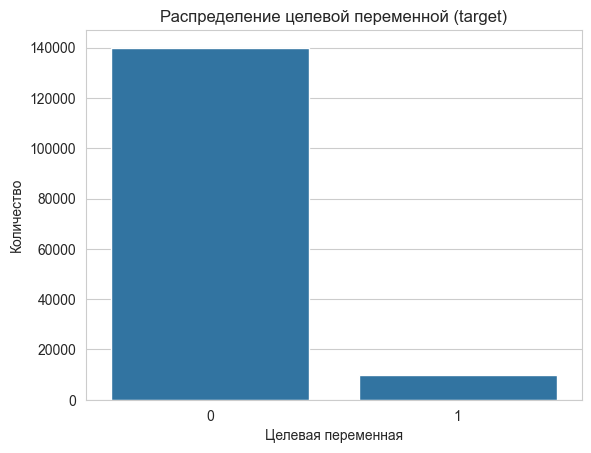

Доля дефолтов (target = 1): 0.06684


In [13]:
sns.countplot(x='SeriousDlqin2yrs', data=df)
plt.title('Распределение целевой переменной (target)')
plt.xlabel('Целевая переменная')
plt.ylabel('Количество')
plt.show()

print(f"Доля дефолтов (target = 1): {df[df['SeriousDlqin2yrs'] == 1].shape[0] / len(df)}")

Наблюдается сильный дисбаланс классов. Доля дефолтов составляет 6,7%.

Для корректной оценки моделей будем использовать stratifed k-fold и метрику ROC-AUC.

---

### Анализ выбросов

Распределение возраста.

In [14]:
df['age'].describe()

count    150000.000
mean         52.295
std          14.772
min           0.000
25%          41.000
50%          52.000
75%          63.000
max         109.000
Name: age, dtype: float64

Обнаружены подозрительные значения возраста (`min` = 0 и `max` = 109, похожие на выбросы).

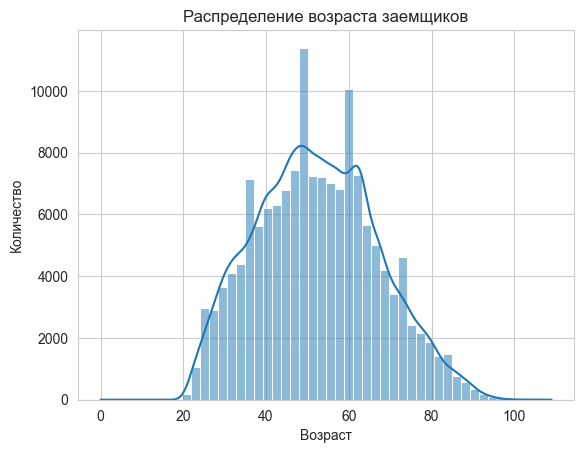

In [15]:
sns.histplot(df['age'], bins=50, kde=True)
plt.title('Распределение возраста заемщиков')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.show()

Рассмотрим выбросы детальнее. Посчитаем количество людей, которым меньше 18 или больше 90 лет.

In [16]:
age_less_18 = df.loc[df['age'] < 18]['age'].count()
age_more_90 = df.loc[df['age'] > 90]['age'].count()

print(f"Количество людей, возраст которых меньше 18 лет: {age_less_18}\nКоличество людей, возраст которых больше 90 лет: {age_more_90}")

Количество людей, возраст которых меньше 18 лет: 1
Количество людей, возраст которых больше 90 лет: 489


Существует всего лишь одно значение меньше 18. Оно же `min` = 0. Заменим его медианой.

In [17]:
median_age = df['age'].median()
df.loc[df['age'] < 18, 'age'] = median_age

В качестве верхнего бизнес-предела возьмём значение возраста 90 лет. Все значения `age`, которые больше 90, будут заменены на него же.

In [18]:
df = clean_age(df)

Посмотрим на распределение возраста заемщиков после очистки.

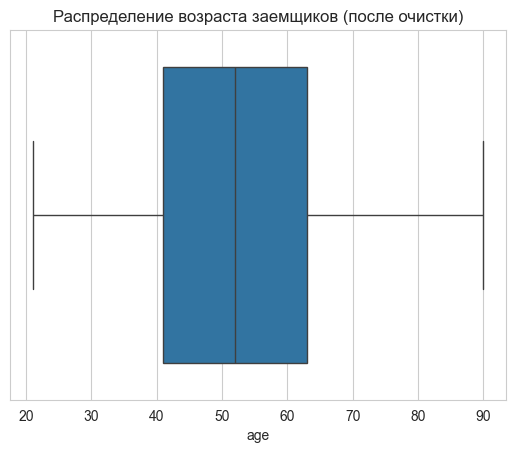

In [19]:
sns.boxplot(x=df['age'])
plt.title('Распределение возраста заемщиков (после очистки)')
plt.show()

---

Общий остаток средств `RevolvingUtilizationOfUnsecuredLines` и отношение расходов к доходам `DebtRatio` выражены в процентном соотношении. С помощью метода `describe` были обнаружены аномалии (экстремальные максимальные значения). Построим графики box-plot.

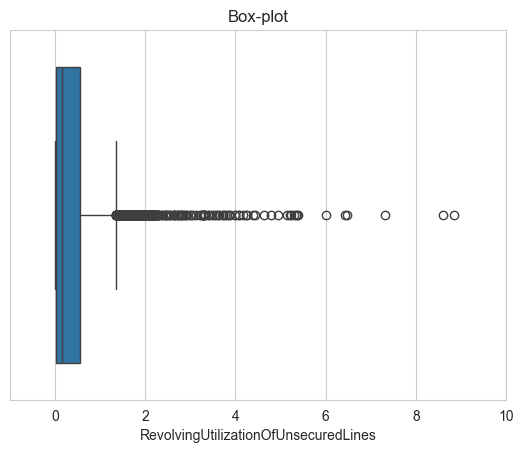

In [20]:
sns.boxplot(x = df['RevolvingUtilizationOfUnsecuredLines'])
plt.title('Box-plot')
plt.xlim(-1, 10)
plt.show()

Визуализация box-plot наглядно демонстрирует, что значения признака `RevolvingUtilizationOfUnsecuredLines` больше 1 "с хвостиком" являются выбросами (Q3 + 1.5 * IQR).

In [21]:
df.loc[df['RevolvingUtilizationOfUnsecuredLines'] > 1].shape[0]

3321

Наблюдается около 2% выбросов для этого признака.

Обработаем пропуски следующим образом: определим верхний лимит как 99-й квантиль; все значения, превышающие 99-й квантиль, будут заменены на него.

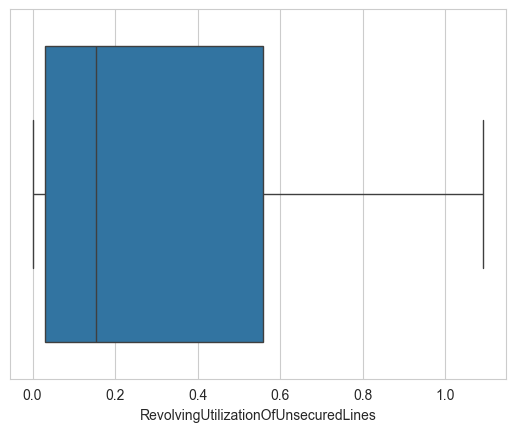

In [22]:
df = limit_outliers(
    df, ['RevolvingUtilizationOfUnsecuredLines']
)

sns.boxplot(x=df['RevolvingUtilizationOfUnsecuredLines'])
plt.show()

Рассмотрим признак `DebtRatio` — отношение всех ежемесячных расходов к ежемесячному доходу.

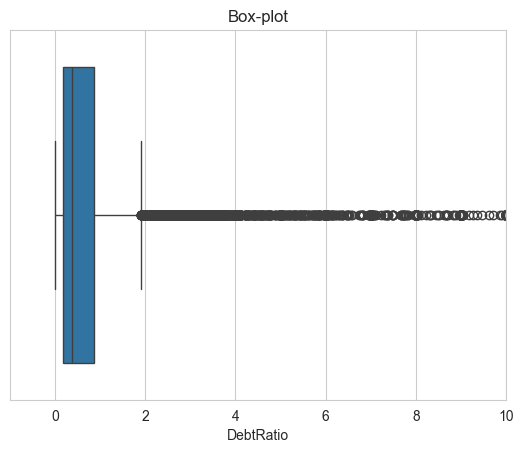

In [23]:
sns.boxplot(x = df['DebtRatio'])
plt.title('Box-plot')
plt.xlim(-1, 10)
plt.show()

С точки зрения банковского риск-менеджмента, ситуация, когда `DebtRatio` (коэффициент долговой нагрузки) значительно больше 1, говорит об аномалии в данных или о специфическом сегменте рынка.

Стоит заметить, что `DebtRatio` становится нереально большим, если доход равен нулю или отсутствует, но при этом есть платежи.

Для минимизации влияния этих аномалий на линейные модели обработаем выбросы следующим образом:
- создадим бинарный признак (флаг) для обозначения экстремальных значений (> 10);
- все значения, превышающие фиксированное значение (10), заменим на это же пороговое значение.

In [24]:
df = process_debt_ratio(df)

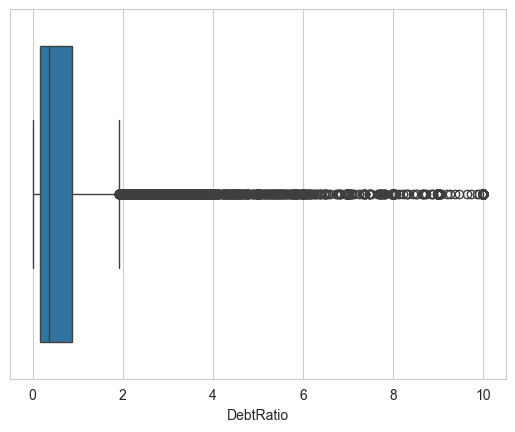

In [25]:
sns.boxplot(x=df['DebtRatio'])
plt.show()

Посмотрим на изменения.

In [26]:
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,DebtRatio_Flag
1,1,0.766,45,2,0.803,9120.0,13,0,6,0,2.0,0
2,0,0.957,40,0,0.122,2600.0,4,0,0,0,1.0,0
3,0,0.658,38,1,0.085,3042.0,2,1,0,0,0.0,0
4,0,0.234,30,0,0.036,3300.0,5,0,0,0,0.0,0
5,0,0.907,49,1,0.025,63588.0,7,0,1,0,0.0,0


---

### Анализ взаимосвязи признаков

Изучим, как влияет возраст заемщика на риск дефолта.

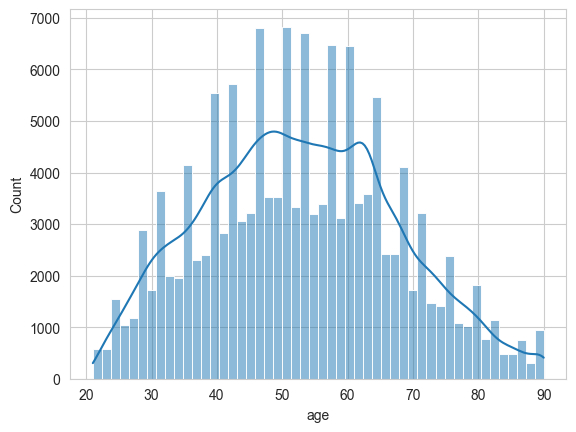

In [27]:
sns.histplot(df.loc[df['SeriousDlqin2yrs'] == 0]['age'], bins=50, kde=True)
plt.show()

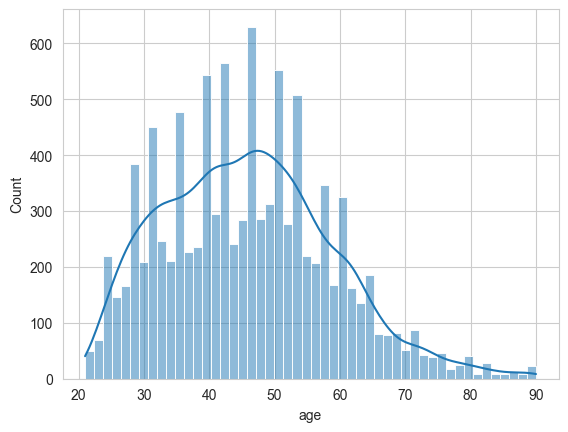

In [28]:
sns.histplot(df.loc[df['SeriousDlqin2yrs'] == 1]['age'], bins=50, kde=True)
plt.show()

In [29]:
age_df = df.groupby('SeriousDlqin2yrs')['age'].agg(['median', 'mean'])
age_df

,median,mean
SeriousDlqin2yrs,,
0,52.0,52.741
1,45.0,45.922


Как можно увидеть, медианный и средний возраст у дефолтеров (заемщиков с просрочкой) часто ниже — распределение скошено вправо.

Отсюда можно сделать **вывод**: молодые группы имеют самую высокую вероятность дефолта (PD), а старшие — самую низкую.

---

Рассмотрим корреляцию признаков.

In [30]:
num_cols = df.select_dtypes(include=np.number).columns.to_list()
num_cols

['SeriousDlqin2yrs',
 'RevolvingUtilizationOfUnsecuredLines',
 'age',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'DebtRatio',
 'MonthlyIncome',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberOfTimes90DaysLate',
 'NumberRealEstateLoansOrLines',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'NumberOfDependents',
 'DebtRatio_Flag']

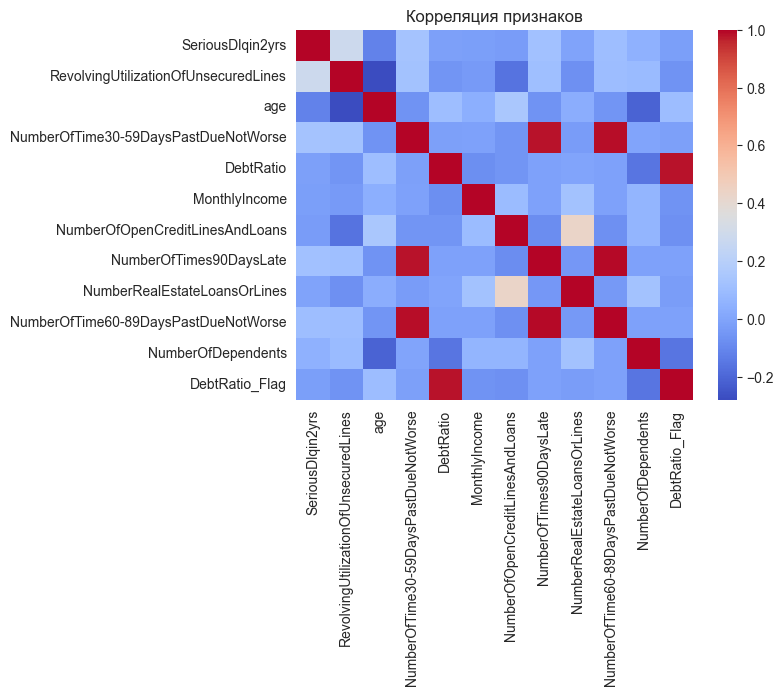

In [31]:
corr = df[num_cols].corr()

sns.heatmap(corr, cmap="coolwarm")
plt.title('Корреляция признаков')
plt.show()

Присутствует сильная корреляция между признаками просрочек платежей (мультиколлинеарность). По сути, эти признаки измеряют одно и то же, различие лишь в периоде, когда был просрочен платеж.

Создадим агрегат и объединим эти признаки в один (сумма всех трех).

In [32]:
df['Total_Late_Payments'] = (
    df['NumberOfTime30-59DaysPastDueNotWorse'] +
    df['NumberOfTime60-89DaysPastDueNotWorse'] +
    df['NumberOfTimes90DaysLate']
)

Проверим.

In [33]:
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,DebtRatio_Flag,Total_Late_Payments
1,1,0.766,45,2,0.803,9120.0,13,0,6,0,2.0,0,2
2,0,0.957,40,0,0.122,2600.0,4,0,0,0,1.0,0,0
3,0,0.658,38,1,0.085,3042.0,2,1,0,0,0.0,0,2
4,0,0.234,30,0,0.036,3300.0,5,0,0,0,0.0,0,0
5,0,0.907,49,1,0.025,63588.0,7,0,1,0,0.0,0,1


---

### Сохранение очищенных данных

Сохраним обработанные данные, которые будут использоваться для обучения моделей.

In [34]:
output_path = PROCESSED_DATA_PATH / 'train_cleaned.parquet'

df.to_parquet(output_path,
              index=False,
              engine='pyarrow',
              compression='snappy')

print("Данные успешно сохранены!")

Данные успешно сохранены!


---

### Вывод

На основе проведённого анализа данных и подготовки данных:
- выявлен сильный дисбаланс целевой переменной (доля дефолтов ~6,7%);
- обработаны аномалии в признаках `age` (ограничение верхним пределом), `RevolvingUtilizationOfUnsecuredLines` (обработка выбросов через capping) и `DebtRatio`.
- обнаружена высокая мультиколлинеарность среди признаков просрочек платежей;
- созданы признаки: `DebtRatio_Flag` и `Total_Late_Payments` (сумма всех просрочек — это позволило решить проблему мультиколлинеарности);
- сформирован финальный датасет, сохранённый в формате `.parquet`. Пропуски намеренно сохранены для обработки на этапе моделирования, чтобы избежать утечки данных.